In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv("data.csv", sep = ';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
len(df)

70000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum().sum()

0

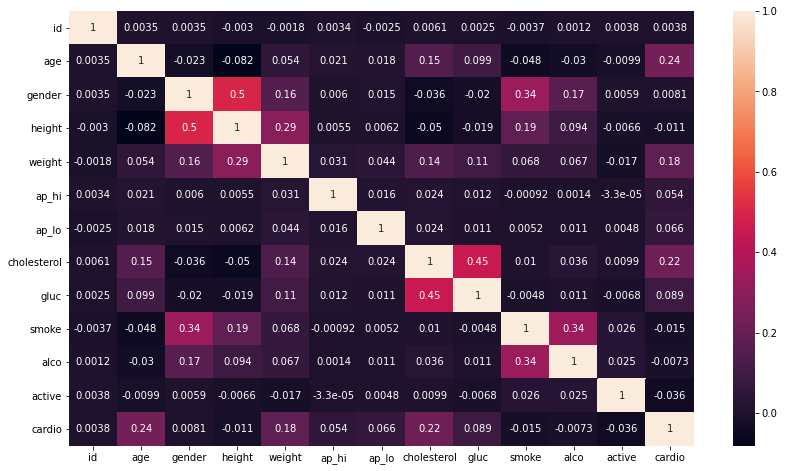

In [8]:
plt.figure(figsize = (14, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

In [9]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
df['cardio'].unique()

array([0, 1], dtype=int64)

In [11]:
df['gender'].unique()
# 1 - women
# 2 - men

array([2, 1], dtype=int64)

In [12]:
df['cholesterol'].unique()
# 1 - normal
# 2 - above normal
# 3 - well above normal

array([1, 3, 2], dtype=int64)

In [13]:
df['gluc'].unique()
# 1 - normal
# 2 - above normal
# 3 - well above normal

array([1, 2, 3], dtype=int64)

In [14]:
df['smoke'].unique()

array([0, 1], dtype=int64)

In [15]:
df['alco'].unique()

array([0, 1], dtype=int64)

In [16]:
df['active'].unique()

array([1, 0], dtype=int64)

# Preprocessing

In [17]:
df['gender'] -= 1

In [18]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,1,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,0,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,0,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,1,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,0,156,56.0,100,60,1,1,0,0,0,0


In [19]:
df.drop(['id'], axis = 1, inplace = True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,1,168,62.0,110,80,1,1,0,0,1,0
1,20228,0,156,85.0,140,90,3,1,0,0,1,1
2,18857,0,165,64.0,130,70,3,1,0,0,0,1
3,17623,1,169,82.0,150,100,1,1,0,0,1,1
4,17474,0,156,56.0,100,60,1,1,0,0,0,0


In [20]:
def days_to_years(days):
    return days//365

In [21]:
df['age'] = df['age'].apply(days_to_years)

In [22]:
df['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

# Visualization

In [23]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,47,0,156,56.0,100,60,1,1,0,0,0,0


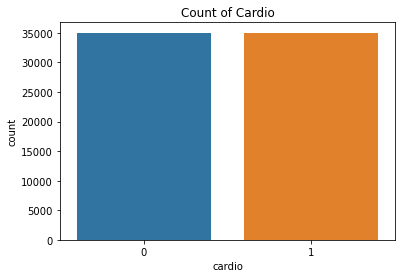

In [24]:
sns.countplot(df["cardio"])
plt.title("Count of Cardio")
plt.show()

In [25]:
len(df[df["cardio"] == 0])

35021

In [26]:
len(df[df["cardio"] == 1])

34979

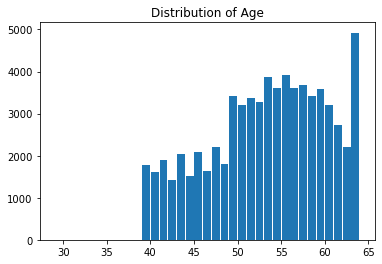

In [27]:
plt.hist(df["age"], bins = 35, rwidth = 0.90)
plt.title("Distribution of Age")
plt.show()

In [28]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,47,0,156,56.0,100,60,1,1,0,0,0,0


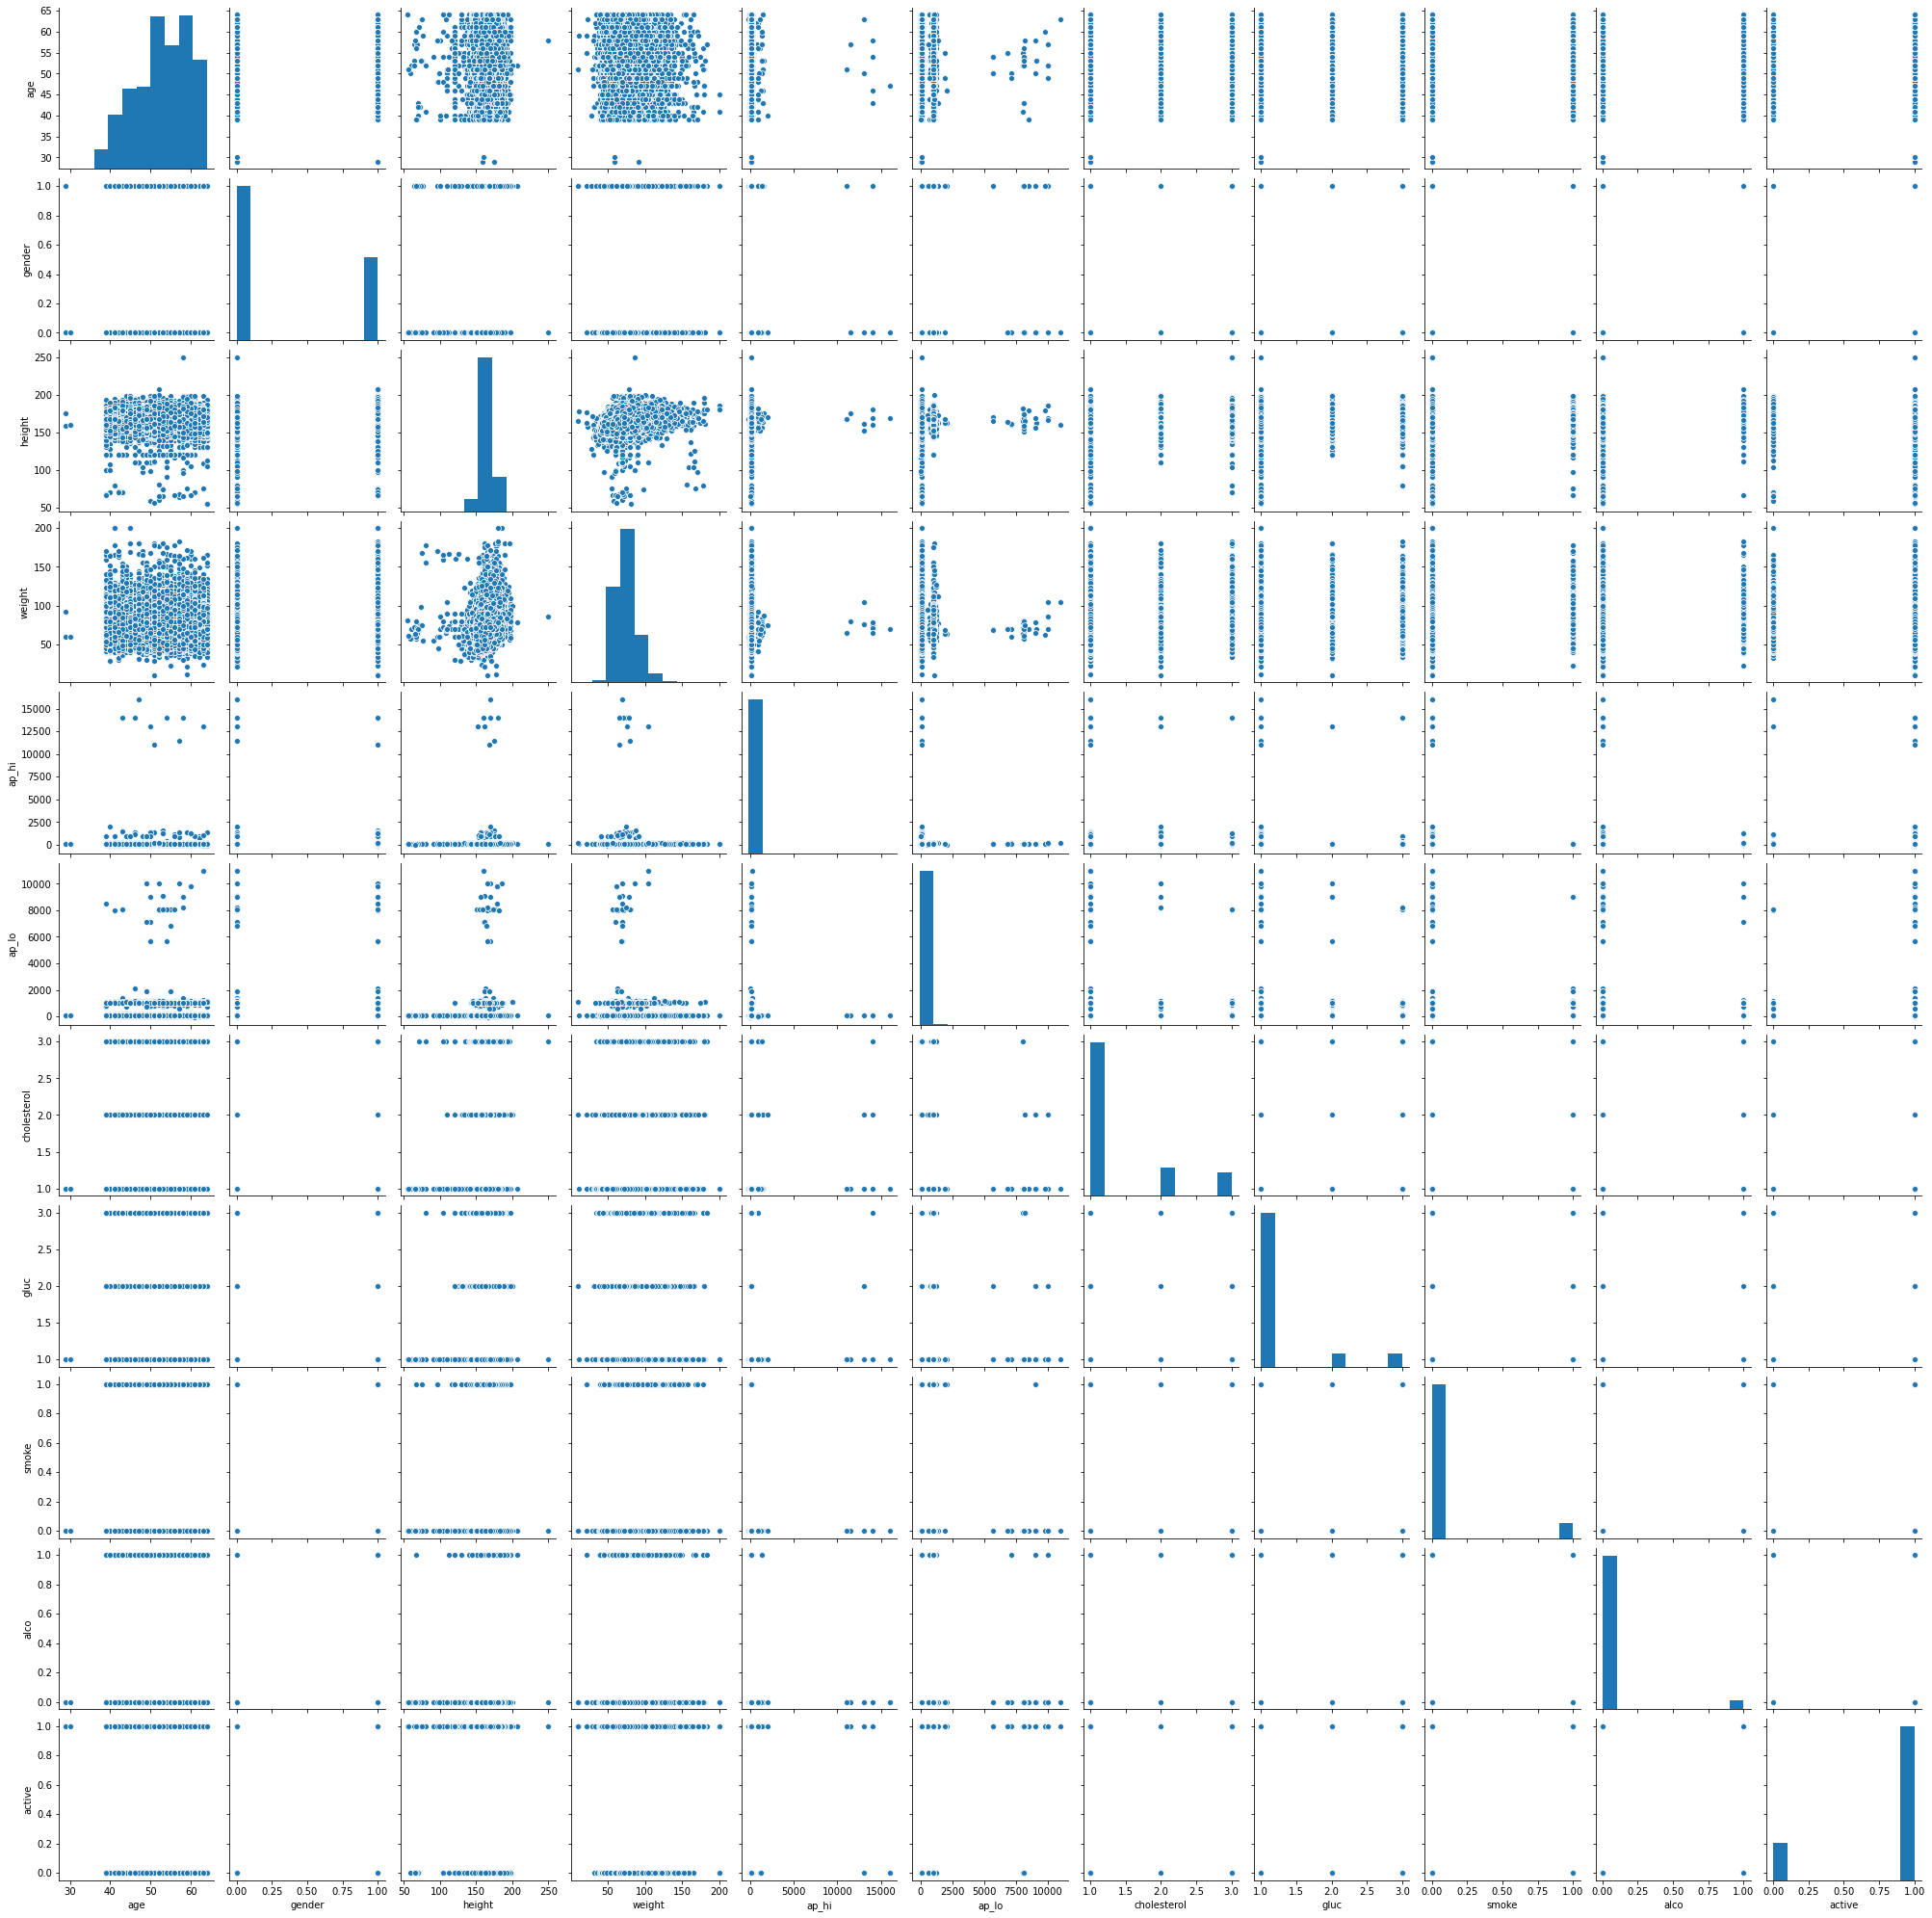

In [29]:
sns.pairplot(df.drop('cardio', axis = 1))

In [30]:
X = df.drop(['cardio'], axis = 1)
y = df['cardio']

In [31]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,1,168,62.0,110,80,1,1,0,0,1
1,55,0,156,85.0,140,90,3,1,0,0,1
2,51,0,165,64.0,130,70,3,1,0,0,0
3,48,1,169,82.0,150,100,1,1,0,0,1
4,47,0,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,168,76.0,120,80,1,1,1,0,1
69996,61,0,158,126.0,140,90,2,2,0,0,1
69997,52,1,183,105.0,180,90,3,1,0,1,0
69998,61,0,163,72.0,135,80,1,2,0,0,0


In [32]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [33]:
X.shape

(70000, 11)

In [34]:
y.shape

(70000,)

In [35]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [36]:
X

array([[-0.41980002,  1.36405487,  0.44345206, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [ 0.31910983, -0.73310834, -1.01816804, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-0.27201805, -0.73310834,  0.07804703, ..., -0.31087913,
        -0.23838436, -2.02360695],
       ...,
       [-0.12423608,  1.36405487,  2.27047718, ..., -0.31087913,
         4.19490608, -2.02360695],
       [ 1.20580165, -0.73310834, -0.16555632, ..., -0.31087913,
        -0.23838436, -2.02360695],
       [ 0.4668918 , -0.73310834,  0.68705541, ..., -0.31087913,
        -0.23838436,  0.49416711]])

In [37]:
X.shape

(70000, 11)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic Regression

In [39]:
accuracies = {}

In [40]:
log_reg = LogisticRegression()

In [41]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

In [43]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

In [44]:
print("Training Accuracy of Logistic Regression: {}%".format(acc_train*100))
print("Testing Accuracy of Logistic Regression: {}%".format(acc_test*100))

Training Accuracy of Logistic Regression: 72.34642857142856%
Testing Accuracy of Logistic Regression: 72.04285714285714%


In [45]:
classification_report(y_test, y_pred_test)

'              precision    recall  f1-score   support\n\n           0       0.70      0.77      0.74      7069\n           1       0.74      0.67      0.70      6931\n\n    accuracy                           0.72     14000\n   macro avg       0.72      0.72      0.72     14000\nweighted avg       0.72      0.72      0.72     14000\n'

In [46]:
accuracies["Logistic Regression"] = acc_test

# Decision Tree Classifier

In [47]:
tree = DecisionTreeClassifier(max_leaf_nodes = 2)

In [48]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=2)

In [49]:
tree_y_pred_train = tree.predict(X_train)
tree_y_pred_test = tree.predict(X_test)

In [50]:
tree_acc_train = accuracy_score(y_train, tree_y_pred_train)
tree_acc_test = accuracy_score(y_test, tree_y_pred_test)

In [51]:
print("Training Accuracy of Decision Tree Classifier: {}%".format(tree_acc_train*100))
print("Testing Accuracy of Decision Tree Classifier: {}%".format(tree_acc_test*100))

Training Accuracy of Decision Tree Classifier: 71.39464285714286%
Testing Accuracy of Decision Tree Classifier: 71.37142857142858%


In [52]:
classification_report(y_test, tree_y_pred_test)

'              precision    recall  f1-score   support\n\n           0       0.68      0.80      0.74      7069\n           1       0.76      0.62      0.68      6931\n\n    accuracy                           0.71     14000\n   macro avg       0.72      0.71      0.71     14000\nweighted avg       0.72      0.71      0.71     14000\n'

In [53]:
accuracies["Decision Tree Classifier"] = tree_acc_test

# Random Forest Classifier

In [54]:
rfc = RandomForestClassifier()

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
rfc_y_pred_train = rfc.predict(X_train)
rfc_y_pred_test = rfc.predict(X_test)

In [57]:
rfc_acc_train = accuracy_score(y_train, rfc_y_pred_train)
rfc_acc_test = accuracy_score(y_test, rfc_y_pred_test)

In [58]:
print("Training Accuracy of Random Forest Classifier: {}%".format(rfc_acc_train*100))
print("Testing Accuracy of Random Forest Classifier: {}%".format(rfc_acc_test*100))

Training Accuracy of Random Forest Classifier: 98.06785714285714%
Testing Accuracy of Random Forest Classifier: 70.63571428571429%


In [59]:
classification_report(y_test, rfc_y_pred_test)

'              precision    recall  f1-score   support\n\n           0       0.71      0.71      0.71      7069\n           1       0.71      0.70      0.70      6931\n\n    accuracy                           0.71     14000\n   macro avg       0.71      0.71      0.71     14000\nweighted avg       0.71      0.71      0.71     14000\n'

In [60]:
accuracies["Random Forest Classifier"] = rfc_acc_test

# K-Nearest Neighbors

In [61]:
knn = KNeighborsClassifier()

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
knn_y_pred_train = knn.predict(X_train)
knn_y_pred_test = knn.predict(X_test)

In [64]:
knn_acc_train = accuracy_score(y_train, knn_y_pred_train)
knn_acc_test = accuracy_score(y_test, knn_y_pred_test)

In [65]:
print("Training Accuracy of KNN Classifier: {}%".format(knn_acc_train*100))
print("Testing Accuracy of KNN Classifier: {}%".format(knn_acc_test*100))

Training Accuracy of KNN Classifier: 76.67857142857143%
Testing Accuracy of KNN Classifier: 64.70714285714286%


In [66]:
classification_report(y_test, knn_y_pred_test)

'              precision    recall  f1-score   support\n\n           0       0.64      0.67      0.66      7069\n           1       0.65      0.62      0.64      6931\n\n    accuracy                           0.65     14000\n   macro avg       0.65      0.65      0.65     14000\nweighted avg       0.65      0.65      0.65     14000\n'

In [67]:
accuracies["K Nearest Neighbors"] = knn_acc_test

# Naive Bayes

In [68]:
nb = GaussianNB()

In [69]:
nb.fit(X_train, y_train)

GaussianNB()

In [70]:
nb_y_pred_train = nb.predict(X_train)
nb_y_pred_test = nb.predict(X_test)

In [71]:
nb_acc_train = accuracy_score(y_train, nb_y_pred_train)
nb_acc_test = accuracy_score(y_test, nb_y_pred_test)

In [72]:
print("Training Accuracy of Gaussian Naive Bayes Classifier: {}%".format(nb_acc_train*100))
print("Testing Accuracy of Gaussian Naive Bayes Classifier: {}%".format(nb_acc_test*100))

Training Accuracy of Gaussian Naive Bayes Classifier: 58.769642857142856%
Testing Accuracy of Gaussian Naive Bayes Classifier: 58.91428571428572%


In [73]:
classification_report(y_test, nb_y_pred_test)

'              precision    recall  f1-score   support\n\n           0       0.56      0.90      0.69      7069\n           1       0.72      0.28      0.40      6931\n\n    accuracy                           0.59     14000\n   macro avg       0.64      0.59      0.54     14000\nweighted avg       0.64      0.59      0.55     14000\n'

In [74]:
accuracies["Naive Bayes"] = nb_acc_test

# Gradient Boosting Classifier

In [75]:
gb = GradientBoostingClassifier()

In [76]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [77]:
gb_y_pred_train = gb.predict(X_train)
gb_y_pred_test = gb.predict(X_test)

In [78]:
gb_acc_train = accuracy_score(y_train, gb_y_pred_train)
gb_acc_test = accuracy_score(y_test, gb_y_pred_test)

In [79]:
print("Training Accuracy of Gradient Boosting Classifier: {}%".format(gb_acc_train*100))
print("Testing Accuracy of Gradient Boosting Classifier: {}%".format(gb_acc_test*100))

Training Accuracy of Gradient Boosting Classifier: 73.92142857142858%
Testing Accuracy of Gradient Boosting Classifier: 73.5142857142857%


In [80]:
classification_report(y_test, gb_y_pred_test)

'              precision    recall  f1-score   support\n\n           0       0.72      0.78      0.75      7069\n           1       0.75      0.69      0.72      6931\n\n    accuracy                           0.74     14000\n   macro avg       0.74      0.73      0.73     14000\nweighted avg       0.74      0.74      0.73     14000\n'

In [81]:
accuracies["Gradient Boosting"] = gb_acc_test

# Neural Networks

In [82]:
def build_model(input_shape):
    model = Sequential([
        Dense(1024, activation = "relu", input_shape = (input_shape)),
        Dense(512, activation = "relu"),
        Dense(512, activation = "relu"),
        Dense(256, activation = "relu"),
        Dense(256, activation = "relu"),
        Dense(128, activation = "relu"),
        Dense(128, activation = "relu"),
        Dense(64, activation = "relu"),
        Dense(32, activation = "relu"),
        Dense(1, activation = "sigmoid")
    ])
    return model

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 11), (14000, 11), (56000,), (14000,))

In [84]:
model = build_model(X_train.shape)

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 56000, 1024)       12288     
_________________________________________________________________
dense_1 (Dense)              (None, 56000, 512)        524800    
_________________________________________________________________
dense_2 (Dense)              (None, 56000, 512)        262656    
_________________________________________________________________
dense_3 (Dense)              (None, 56000, 256)        131328    
_________________________________________________________________
dense_4 (Dense)              (None, 56000, 256)        65792     
_________________________________________________________________
dense_5 (Dense)              (None, 56000, 128)        32896     
_________________________________________________________________
dense_6 (Dense)              (None, 56000, 128)        1

In [86]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [87]:
history = model.fit(
    X_train,
    y_train,
    epochs = 20,
    validation_data = (X_test, y_test),
    verbose = 1
)

Epoch 1/20
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5766 - accuracy: 0.7106 - val_loss: 0.5639 - val_accuracy: 0.7157
Epoch 2/20
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5522 - accuracy: 0.7293 - val_loss: 0.5492 - val_accuracy: 0.7299
Epoch 3/20
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5483 - accuracy: 0.7311 - val_loss: 0.5570 - val_accuracy: 0.7177
Epoch 4/20
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5466 - accuracy: 0.7334 - val_loss: 0.5440 - val_accuracy: 0.7286
Epoch 5/20
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5459 - accuracy: 0.7322 - val_loss: 0.5462 - val_accuracy: 0.7306
Epoch 6/20
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5450 - accuracy: 0.7336 - val_loss: 0.5461 - val_accuracy: 0.7317
Epoch 7/20
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5442 - accuracy: 0.7341 - val_loss: 0.5501 - val_accuracy:

In [88]:
test_loss, test_acc = model.evaluate(X_test, y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.7325


In [89]:
test_loss

0.5447503328323364

In [90]:
test_acc

0.7325000166893005

In [91]:
print("The Test Loss of Neural Network Model is: {}".format(test_loss))
print("The Test Accuracy of Neural Network Model is: {}%".format(test_acc*100))

The Test Loss of Neural Network Model is: 0.5447503328323364
The Test Accuracy of Neural Network Model is: 73.25000166893005%


In [92]:
def plot_graphs(histoy, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_"+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_" + metric])
    plt.show()

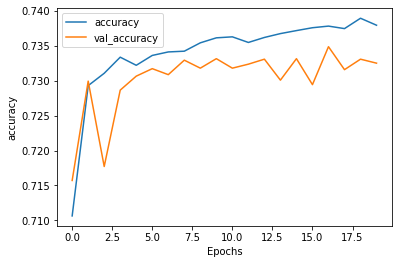

In [93]:
plot_graphs(history, "accuracy")

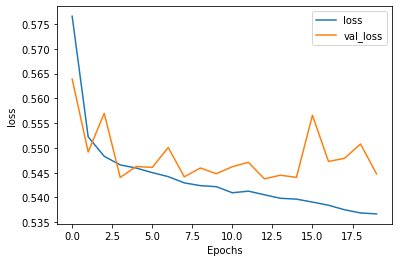

In [94]:
plot_graphs(history, "loss")

In [95]:
accuracies["Neural Network"] = test_acc

In [96]:
accuracies

{'Logistic Regression': 0.7204285714285714,
 'Decision Tree Classifier': 0.7137142857142857,
 'Random Forest Classifier': 0.7063571428571429,
 'K Nearest Neighbors': 0.6470714285714285,
 'Naive Bayes': 0.5891428571428572,
 'Gradient Boosting': 0.7351428571428571,
 'Neural Network': 0.7325000166893005}

In [97]:
accuracy = pd.Series(accuracies)

In [98]:
accuracy*=100

In [99]:
accuracy

Logistic Regression         72.042857
Decision Tree Classifier    71.371429
Random Forest Classifier    70.635714
K Nearest Neighbors         64.707143
Naive Bayes                 58.914286
Gradient Boosting           73.514286
Neural Network              73.250002
dtype: float64

In [100]:
accuracy = accuracy.sort_values()

In [106]:
accuracy

Naive Bayes                 58.914286
K Nearest Neighbors         64.707143
Random Forest Classifier    70.635714
Decision Tree Classifier    71.371429
Logistic Regression         72.042857
Neural Network              73.250002
Gradient Boosting           73.514286
dtype: float64